# Data

> Fill in a module description here

In [1]:
#| default_exp core

In [2]:
#| hide
from nbdev.showdoc import *

In [36]:
#| export
from pathlib import Path
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

Path.ls = lambda x: list(x.iterdir())

## Images

In [7]:
#| hide
path_x = Path("/media/dimi/TOSHIBA EXT/Dimitrij Original Images")
path_y = Path("/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks")

In [23]:
#| hide
path_x.ls()

[Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA02_correctNames_SingleCores'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA03_correctNames_SingleCores'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA05_correctNames_SingleCores'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA06_correctNames_SingleCores'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA07_correctNames_SingleCores'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA08_correctNames_SingleCores'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA25_correctNames_SingleCores'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA26_correctNames_SingleCores'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA27_correctNames_SingleCores'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA28_correctNames_SingleCores'),
 Path('/me

In [43]:
#| export
def _get_files(p, fs, extensions=None):
    p = Path(p)
    res = [p/f for f in fs if not f.startswith('.')
           and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)]
    return res

def get_files(path, extensions=None, recurse=False, include=None):
    "Source: fast.ai, Jeremy Howard"
    path = Path(path)
    extensions = {e.lower() for e in extensions}
    if recurse:
        res = []
        for i,(p,d,f) in enumerate(os.walk(path)): # returns (dirpath, dirnames, filenames)
            if include is not None and i==0: d[:] = [o for o in d if o in include]
            else:                            d[:] = [o for o in d if not o.startswith('.')]
            res += _get_files(p, f, extensions)
        return res
    else:
        f = [o.name for o in os.scandir(path) if o.is_file()]
        return _get_files(path, f, extensions)

In [26]:
fn_x = get_files(path_x, recurse=True, extensions=[".tif"])
fn_y = get_files(path_y, recurse=True, extensions=[".tif"])
len(fn_x), len(fn_y)

(1316, 1229)

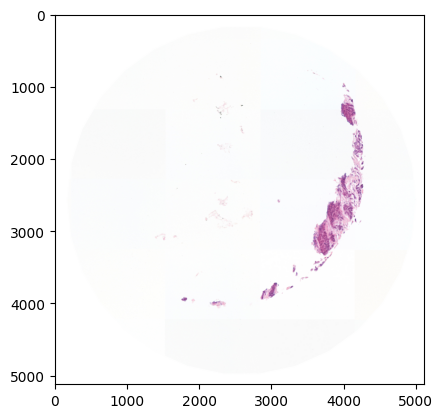

In [34]:
x = Image.open(fn_x[0])
plt.imshow(x)

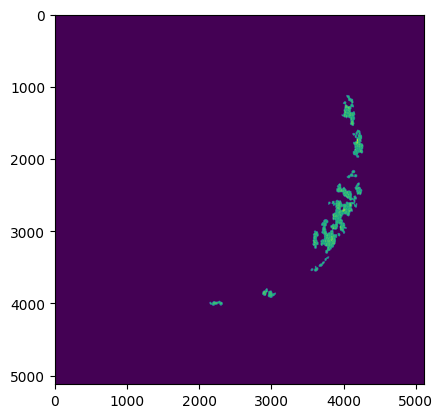

In [35]:
y = Image.open(fn_y[0])
plt.imshow(y)

In [38]:
y=np.array(y)

In [40]:
y[2990:3010,3990:4010]

array([[3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [3862, 3862, 3862, 3862, 3862, 386

In [41]:
fn_x[:10]

[Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/12-E.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/2-D.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/5-A.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/10-A.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/10-B.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/10-C.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/10-D.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/10-E.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/10-F.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/10-G.tif')]

In [42]:
fn_y[:10]

[Path('/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/TMA01/12-E.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/TMA01/2-D.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/TMA01/5-C.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/TMA01/10-A.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/TMA01/10-B.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/TMA01/10-C.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/TMA01/10-D.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/TMA01/10-E.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/TMA01/10-F.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/TMA01/10-G.tif')]

## Clinical data

In [44]:
path_c = Path("/media/dimi/TOSHIBA EXT/Dimitrij Single Cores/allTXT")

In [45]:
#| export 
import pandas as pd

In [47]:
fn_c = get_files(path_c, recurse=False, extensions=[".txt"])

In [48]:
fn_c

[Path('/media/dimi/TOSHIBA EXT/Dimitrij Single Cores/allTXT/TMA1.txt'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Single Cores/allTXT/TMA10.txt'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Single Cores/allTXT/TMA11.txt'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Single Cores/allTXT/TMA12.txt'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Single Cores/allTXT/TMA13.txt'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Single Cores/allTXT/TMA14.txt'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Single Cores/allTXT/TMA15.txt'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Single Cores/allTXT/TMA16.txt'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Single Cores/allTXT/TMA17.txt'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Single Cores/allTXT/TMA18.txt'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Single Cores/allTXT/TMA19.txt'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Single Cores/allTXT/TMA2.txt'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Single Cores/allTXT/TMA20.txt'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Single Cores/

In [69]:
fn = fn_c[0]

In [70]:
df = pd.read_csv(fn, sep="\t", encoding = "ISO-8859-1", engine="python")

In [71]:
df.shape

(100, 16265)

In [72]:
df.iloc[0:5,0:30]

,Relevanz,TMA-Spot,Alternative Belegung,Pat.-ID,E.-Datum,Alter,G,T,gr. Tumordurchmesser,weitere Tumordurchmesser,...,VanNuys,WHO,WHO_DCIS,Tumorart,Probenart,Seite,Status,letzte EE,EE2,EE3
0,2,B11,NaN,44606,15.10.2001,45,2,pT1b,"0,6",,...,NaN,M 8500/3,NaN,invasiv duktal,Exzidat,re,NaN,16.09.2020,02.12.2015,30.07.2008
1,2,A13,NaN,44622,16.02.2000,56,2,pT1b,"0,8",NaN,...,NaN,M 8500/3,NaN,invasiv duktal,Exzidat,re,NaN,12.09.2008,NaN,NaN
2,2,B02,NaN,45062,13.07.2000,67,2,pT1b,"0,6",,...,NaN,M 8520/3,NaN,invasiv lobulär,Segment,li,NaN,16.09.2020,25.11.2015,30.07.2008
3,2,D04,26_F13,45160,18.08.2003,55,2,pT1b,"0,9",,...,NaN,M 8500/3,NaN,invasiv duktal,Exzidat,li,NaN,15.12.2015,20.01.2009,NaN
4,2,D08,NaN,45333,10.11.2003,66,2,pT1b,"0,7",NaN,...,NaN,M 8500/3,NaN,invasiv duktal,Segment,re,NaN,25.09.2020,12.12.2015,31.10.2008


In [73]:
df.columns

Index(['Relevanz', 'TMA-Spot', 'Alternative Belegung', 'Pat.-ID', 'E.-Datum',
       'Alter', 'G', 'T', 'gr. Tumordurchmesser', 'weitere Tumordurchmesser',
       ...
       'Unnamed: 16255', 'Unnamed: 16256', 'Unnamed: 16257', 'Unnamed: 16258',
       'Unnamed: 16259', 'Unnamed: 16260', 'Unnamed: 16261', 'Unnamed: 16262',
       'Unnamed: 16263', 'Unnamed: 16264'],
      dtype='object', length=16265)

In [74]:
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]

In [75]:
df.shape

(100, 65)

In [76]:
df.columns

Index(['Relevanz', 'TMA-Spot', 'Alternative Belegung', 'Pat.-ID', 'E.-Datum',
       'Alter', 'G', 'T', 'gr. Tumordurchmesser', 'weitere Tumordurchmesser',
       'N', 'ER', 'PR', 'Her2/neu', 'Her2/neu-Score', 'Ki67', 'Ki67_%',
       'DegreeOfTubuleFormation', 'NuclearPleomorphism', 'Mitosis', 'VanNuys',
       'WHO', 'WHO_DCIS', 'Tumorart', 'Probenart', 'Seite', 'Status',
       'letzte EE', 'EE2', 'EE3', 'Tod_Quelle', 'Tod_Datum', 'Rezidiv_j/n',
       'Metastase_j/n', 'Rezidivdatum_2011', 'Rezidivdatum2011_2',
       'Rezidivdatum_2015', 'Rezidivdatum_2020', 'Metastase_Lokalisation',
       'AB_Massnahme', 'AB_Radiatio', 'Radiatio_j/n', 'AB_zytotox_Medikament',
       'AB_zytotox_Zyklen', 'AB_zytotox_Abbruch', 'Chemo_j/n',
       'Chemo_Zeitpunkt', 'Chemo_Medikament', 'AB_endokr_Dauer',
       'AB_endokr_Medikament', 'AB_endokr_Abbruch', 'Antihormon_j/n',
       'Tamoxifen_2020', 'Antihormon_2015', 'Tamoxifen_2015', 'Tamoxifen_2014',
       'Tamoxifen_Exprimage', 'AH_unbekannt', 'A

In [77]:
fn

Path('/media/dimi/TOSHIBA EXT/Dimitrij Single Cores/allTXT/TMA1.txt')

In [78]:
fn.stem

'TMA1'

In [79]:
df.insert(0, 'TMA_ID', fn.stem)

In [81]:
df.head()

,TMA_ID,Relevanz,TMA-Spot,Alternative Belegung,Pat.-ID,E.-Datum,Alter,G,T,gr. Tumordurchmesser,...,Tamoxifen_2014,Tamoxifen_Exprimage,AH_unbekannt,AH_Arimidex,AH_Aromasin,AH_Femara,Herceptin_j/n,Biophosphonate_j/n,Biophosphonate_Text,AB_Besonderheiten
0,TMA1,2,B11,NaN,44606,15.10.2001,45,2,pT1b,"0,6",...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,TMA1,2,A13,NaN,44622,16.02.2000,56,2,pT1b,"0,8",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TMA1,2,B02,NaN,45062,13.07.2000,67,2,pT1b,"0,6",...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,TMA1,2,D04,26_F13,45160,18.08.2003,55,2,pT1b,"0,9",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TMA1,2,D08,NaN,45333,10.11.2003,66,2,pT1b,"0,7",...,NaN,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


## One clinical dataframe

In [116]:
#|export
def get_clinical_data(p):
    "p: path to directory with files"
    dfs = []
    for fn in p:
        df = pd.read_csv(fn, sep="\t", encoding = "ISO-8859-1", engine="python")
        df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]
        df.insert(0, 'TMA_ID', fn.stem)
        dfs.append(df)
    return pd.concat(dfs)

In [117]:
len(df)

100

In [118]:
df_c = get_clinical_data(fn_c)

In [119]:
df_c.shape

(3133, 66)

In [86]:
df_c.head()

,TMA_ID,Relevanz,TMA-Spot,Alternative Belegung,Pat.-ID,E.-Datum,Alter,G,T,gr. Tumordurchmesser,...,Tamoxifen_2014,Tamoxifen_Exprimage,AH_unbekannt,AH_Arimidex,AH_Aromasin,AH_Femara,Herceptin_j/n,Biophosphonate_j/n,Biophosphonate_Text,AB_Besonderheiten
0,TMA1,2,B11,NaN,44606.0,15.10.2001,45.0,2,pT1b,"0,6",...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,TMA1,2,A13,NaN,44622.0,16.02.2000,56.0,2,pT1b,"0,8",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TMA1,2,B02,NaN,45062.0,13.07.2000,67.0,2,pT1b,"0,6",...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,TMA1,2,D04,26_F13,45160.0,18.08.2003,55.0,2,pT1b,"0,9",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TMA1,2,D08,NaN,45333.0,10.11.2003,66.0,2,pT1b,"0,7",...,NaN,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [87]:
df_c.columns

Index(['TMA_ID', 'Relevanz', 'TMA-Spot', 'Alternative Belegung', 'Pat.-ID',
       'E.-Datum', 'Alter', 'G', 'T', 'gr. Tumordurchmesser',
       'weitere Tumordurchmesser', 'N', 'ER', 'PR', 'Her2/neu',
       'Her2/neu-Score', 'Ki67', 'Ki67_%', 'DegreeOfTubuleFormation',
       'NuclearPleomorphism', 'Mitosis', 'VanNuys', 'WHO', 'WHO_DCIS',
       'Tumorart', 'Probenart', 'Seite', 'Status', 'letzte EE', 'EE2', 'EE3',
       'Tod_Quelle', 'Tod_Datum', 'Rezidiv_j/n', 'Metastase_j/n',
       'Rezidivdatum_2011', 'Rezidivdatum2011_2', 'Rezidivdatum_2015',
       'Rezidivdatum_2020', 'Metastase_Lokalisation', 'AB_Massnahme',
       'AB_Radiatio', 'Radiatio_j/n', 'AB_zytotox_Medikament',
       'AB_zytotox_Zyklen', 'AB_zytotox_Abbruch', 'Chemo_j/n',
       'Chemo_Zeitpunkt', 'Chemo_Medikament', 'AB_endokr_Dauer',
       'AB_endokr_Medikament', 'AB_endokr_Abbruch', 'Antihormon_j/n',
       'Tamoxifen_2020', 'Antihormon_2015', 'Tamoxifen_2015', 'Tamoxifen_2014',
       'Tamoxifen_Exprimage', '

## One images dataframe

In [88]:
fn_x[:5]

[Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/12-E.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/2-D.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/5-A.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/10-A.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/10-B.tif')]

In [89]:
fn_y[:5]

[Path('/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/TMA01/12-E.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/TMA01/2-D.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/TMA01/5-C.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/TMA01/10-A.tif'),
 Path('/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/TMA01/10-B.tif')]

In [122]:
fn = fn_x[1]

In [123]:
fn

Path('/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/2-D.tif')

In [141]:
#| export
def _get_tma_id(fn):
    """fn: pathlib path to file"""
    tma = fn.parent.name.split('_')[0]
    return tma[:-2] + tma[-2:].lstrip('0')

def get_tma_id(fns):
    """fns: list of pathlib paths"""
    return list(map(_get_tma_id, fns))

In [144]:
_get_tma_id(fn)

'TMA1'

In [145]:
#| export
def _get_tma_spot(fn):
    """fn: pathlib path to file"""
    f = fn.stem[-1]+fn.stem[:-2]
    return f if len(f)==3 else f[0]+'0'+f[1] 

def get_tma_spot(fns):
    """fns: list of pathlib paths"""
    return list(map(_get_tma_spot, fns))

In [146]:
_get_tma_spot(fn_x[10])

'H10'

In [153]:
df_x = pd.DataFrame({'TMA_ID': get_tma_id(fn_x), 
                     'TMA-Spot':get_tma_spot(fn_x), 
                     'fn_x':fn_x})

df_y = pd.DataFrame({'TMA_ID': get_tma_id(fn_y), 
                     'TMA-Spot':get_tma_spot(fn_y), 
                     'fn_x':fn_y})

In [154]:
df_x.shape

(1316, 3)

In [155]:
df_y.shape

(1229, 3)

In [156]:
df_x.head()

,TMA_ID,TMA-Spot,fn_x
0,TMA1,E12,/media/dimi/TOSHIBA EXT/Dimitrij Original Imag...
1,TMA1,D02,/media/dimi/TOSHIBA EXT/Dimitrij Original Imag...
2,TMA1,A05,/media/dimi/TOSHIBA EXT/Dimitrij Original Imag...
3,TMA1,A10,/media/dimi/TOSHIBA EXT/Dimitrij Original Imag...
4,TMA1,B10,/media/dimi/TOSHIBA EXT/Dimitrij Original Imag...


In [157]:
df_y.head()

,TMA_ID,TMA-Spot,fn_x
0,TMA1,E12,/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/T...
1,TMA1,D02,/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/T...
2,TMA1,C05,/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/T...
3,TMA1,A10,/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/T...
4,TMA1,B10,/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/T...


In [159]:
df_xy = pd.merge(df_x, df_y, on=["TMA_ID", "TMA-Spot"])

In [160]:
df_xy.shape

(1229, 4)

In [161]:
df_xy.head()

,TMA_ID,TMA-Spot,fn_x_x,fn_x_y
0,TMA1,E12,/media/dimi/TOSHIBA EXT/Dimitrij Original Imag...,/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/T...
1,TMA1,D02,/media/dimi/TOSHIBA EXT/Dimitrij Original Imag...,/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/T...
2,TMA1,A05,/media/dimi/TOSHIBA EXT/Dimitrij Original Imag...,/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/T...
3,TMA1,A10,/media/dimi/TOSHIBA EXT/Dimitrij Original Imag...,/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/T...
4,TMA1,B10,/media/dimi/TOSHIBA EXT/Dimitrij Original Imag...,/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/T...


In [162]:
df_c.head()

,TMA_ID,Relevanz,TMA-Spot,Alternative Belegung,Pat.-ID,E.-Datum,Alter,G,T,gr. Tumordurchmesser,...,Tamoxifen_2014,Tamoxifen_Exprimage,AH_unbekannt,AH_Arimidex,AH_Aromasin,AH_Femara,Herceptin_j/n,Biophosphonate_j/n,Biophosphonate_Text,AB_Besonderheiten
0,TMA1,2,B11,NaN,44606.0,15.10.2001,45.0,2,pT1b,"0,6",...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,TMA1,2,A13,NaN,44622.0,16.02.2000,56.0,2,pT1b,"0,8",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TMA1,2,B02,NaN,45062.0,13.07.2000,67.0,2,pT1b,"0,6",...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,TMA1,2,D04,26_F13,45160.0,18.08.2003,55.0,2,pT1b,"0,9",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TMA1,2,D08,NaN,45333.0,10.11.2003,66.0,2,pT1b,"0,7",...,NaN,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [163]:
df_all = pd.merge(df_xy, df_c, on=["TMA_ID", "TMA-Spot"])

In [164]:
df_all.shape

(1180, 68)

In [166]:
df_all.head()

,TMA_ID,TMA-Spot,fn_x_x,fn_x_y,Relevanz,Alternative Belegung,Pat.-ID,E.-Datum,Alter,G,...,Tamoxifen_2014,Tamoxifen_Exprimage,AH_unbekannt,AH_Arimidex,AH_Aromasin,AH_Femara,Herceptin_j/n,Biophosphonate_j/n,Biophosphonate_Text,AB_Besonderheiten
0,TMA1,E12,/media/dimi/TOSHIBA EXT/Dimitrij Original Imag...,/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/T...,2,NaN,76987.0,21.11.2004,57.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,TMA1,D02,/media/dimi/TOSHIBA EXT/Dimitrij Original Imag...,/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/T...,2,26_F05,64717.0,05.08.2003,64.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TMA1,A05,/media/dimi/TOSHIBA EXT/Dimitrij Original Imag...,/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/T...,2,NaN,46657.0,25.02.1998,35.0,2,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TMA1,A10,/media/dimi/TOSHIBA EXT/Dimitrij Original Imag...,/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/T...,2,NaN,69211.0,15.07.1999,59.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TMA1,B10,/media/dimi/TOSHIBA EXT/Dimitrij Original Imag...,/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/T...,2,NaN,79717.0,11.10.2001,62.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
